In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
train = pd.read_csv('train.csv', index_col='ID')
train.shape

(4459, 4992)

In [3]:
train.head()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
ID,,,,,,,,,,,,,,,,,,,,,
000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv('test.csv', index_col='ID')
test.shape

(49342, 4991)

In [5]:
test.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
ID,,,,,,,,,,,,,,,,,,,,,
000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print('Missing data in trainset :', train.isnull().sum().sum())
print('Missing data in testset :', test.isnull().sum().sum())

Missing data in trainset : 0
Missing data in testset : 0


In [9]:
import matplotlib.pyplot as plt
train['target'].plot(kind='density')
train['target'].skew()

2.0859665375858056

In [10]:
from scipy import stats
targetBC, lmbda = stats.boxcox(train['target'])

In [11]:
colint64=0
colobject=0

for column in train.columns:
    if train[column].dtype == 'O':
        print(f'{column} is categorical')
        colobject+=1
    elif train[column].dtype == 'int64':
        colint64+=1
print(f'int64 --> {colint64}  /  object --> {colobject}')

int64 --> 3147  /  object --> 0


In [12]:
skewed = 0
skewlist = []
treshold = .5
for column in train.columns:
    skewval = train[column].skew()
    if skewval > treshold:
        skewed += 1
        skewlist.append(skewval)
        #print('Skewness for {} - {}'.format(column, train[column].skew()))
average = np.array(skewlist).mean()
skewstd = np.array(skewlist).std()
print(f'{skewed} cols skewed, average {average}, std {skewstd}')

4736 cols skewed, average 32.30445086114545, std 17.80271136570211


In [13]:
df = train.corr()

In [14]:
df['target'].sort_values(ascending=False).iloc[1:6]

555f18bd3    0.273379
9fd594eec    0.270019
5bc7ab64f    0.267858
cbbc9c431    0.265005
f190486d6    0.263821
Name: target, dtype: float64

/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


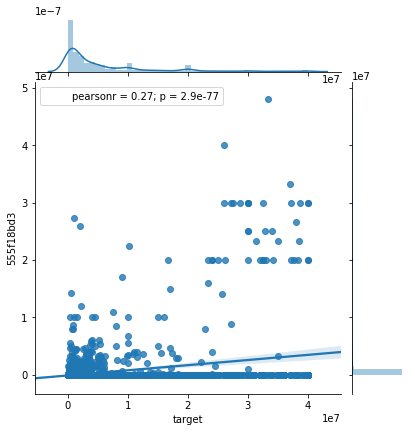

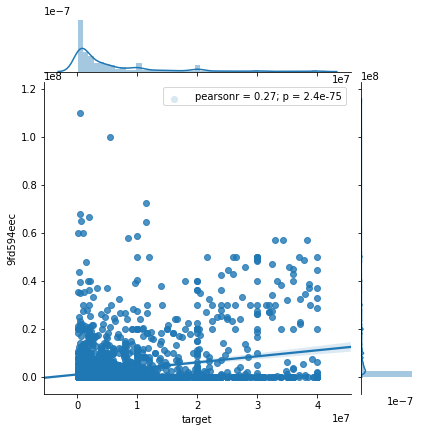

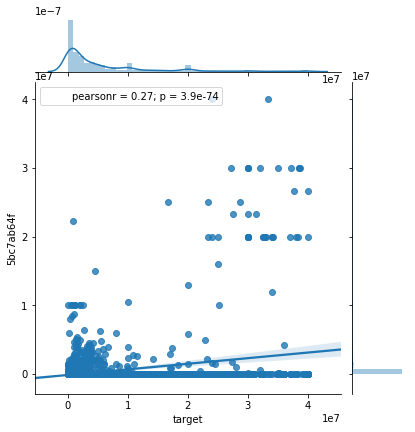

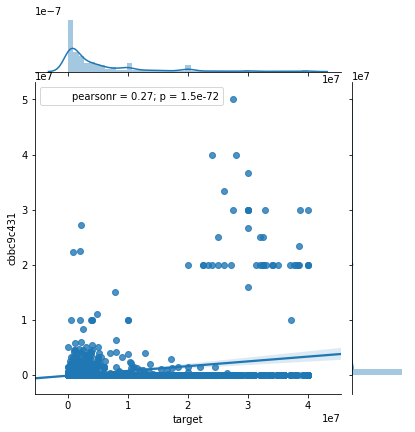

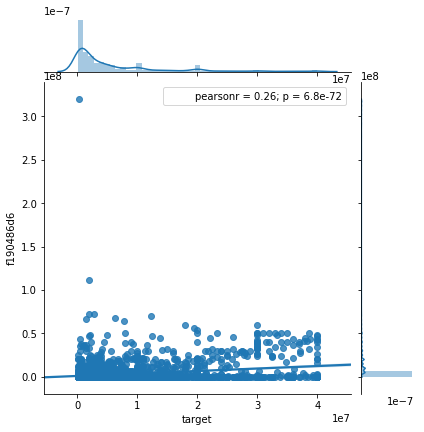

In [15]:
import seaborn as sns
for index, value in df['target'].sort_values(ascending=False).iloc[1:6].items():
    sns.jointplot(data=train, x='target', y=index, kind="reg")

In [16]:
todrop = []
for index, value in df['target'][df['target'].isnull()].items():
    todrop.append(index)
len(todrop)
tokeep = [x for x in train.columns if x not in todrop and x != 'target']
print(f'tokeep length:{len(tokeep)}  -  todrop length:{len(todrop)}')

tokeep length:4735  -  todrop length:256


In [17]:
'target' in tokeep

False

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = train[tokeep]
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

pca = PCA()
Xpca = pca.fit_transform(Xscaled)

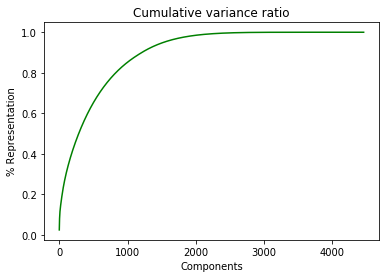

In [19]:
componantsprinccumsum = pca.explained_variance_ratio_.cumsum()
plt.plot(range(len(componantsprinccumsum)), componantsprinccumsum, color = 'green')
plt.title('Cumulative variance ratio')
plt.ylabel('% Representation')
plt.xlabel('Components')
plt.show()

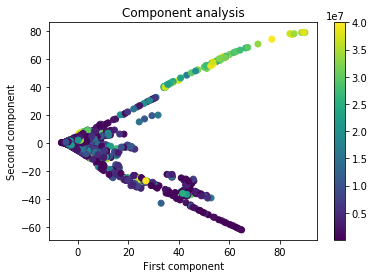

In [20]:
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=train['target'])
# Axis
#plt.plot([-40, 40], [0, 0], color='black', ls='--')
#plt.plot([0, 0], [-14, 14], color='black', ls='--')
# Title
plt.title('Component analysis')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.colorbar()
plt.show()

In [21]:
X = train[tokeep]
y = targetBC

In [36]:
X.shape

(4459, 4735)

In [48]:
X = train[tokeep]
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

pca = PCA(n_components=3000)
Xpca = pca.fit_transform(Xscaled)
Xpca.shape

(4459, 3000)

In [22]:
import lightgbm as lgb

gbm = lgb.LGBMRegressor()

In [26]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [45]:
from sklearn.pipeline import Pipeline
pca=PCA(n_components=50)
    
gbm = lgb.LGBMRegressor(objective='regression')

pipe = [('scaler', scaler), ('pca', pca), ('gbm', gbm)]
regpip = Pipeline(pipe)
regpip.fit(X,y)

In [27]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from sklearn.model_selection import cross_val_score

In [ ]:
counter=0
bestscore = 1e20
def objective(params):
    global counter, bestscore
    counter +=1
    hyperparams = {
        #'num_leaves': int(params['num_leaves']),
        'min_data_in_leaf': int(params['min_data_in_leaf']),
        'min_child_weight': params['min_child_weight'],
        #'n_estimators': int(params['n_estimators']),
        'n_estimators':750,
        'colsample_bytree': params['colsample_bytree'],
        #'bagging_fraction': params['bagging_fraction'],
        #'bagging_freq': params['bagging_freq'],
        #'reg_alpha': params['reg_alpha'],
        #'reg_lambda': params['reg_lambda'],
        'max_depth':int(params['max_depth']),
        #'learning_rate':params['learning_rate'],
        'seed':0,
        }
    
    #pca=PCA(n_components=int(params['pca_n_components']))
    
    gbm = lgb.LGBMRegressor(objective='regression', **hyperparams)

    #pipe = [('scaler', scaler), ('pca', pca), ('gbm', gbm)]
    #regpip = Pipeline(pipe)    
    
    score = cross_val_score(gbm, Xpca, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=-2, verbose=0).mean()
    #if counter%5 == 0:
    #    print("{} - MSE {}".format(counter, -score))
    if -score < bestscore:
        print("Attempt {} - MSE {} - params {}".format(counter, -score, hyperparams))
        print()
        bestscore = -score
    else:
        print('Attempt {}'.format(counter))
    return -score

space = {
    #'num_leaves': hp.uniform('num_leaves', 5, 40),
    'min_data_in_leaf': hp.uniform('min_data_in_leaf',10, 40),
    'min_child_weight': hp.loguniform('min_child_weight', -8, 2),
    #'n_estimators': hp.uniform('n_estimators', 100, 5000),
    'colsample_bytree': hp.uniform('colsample_bytree', 0., 1.0),
    #'bagging_fraction': hp.uniform('bagging_fraction', 0., 1.0),
    #'bagging_freq': hp.randint('bagging_freq', 15),
    #'reg_alpha': hp.loguniform('reg_alpha', -3, 3),
    #'reg_lambda': hp.loguniform('reg_lambda', -3, 3),
    'max_depth': hp.uniform('max_depth', 3, 15),
    #'learning_rate': hp.uniform('learning_rate', 0.0001, .1),
    #'pca_n_components': hp.uniform('pca_n_components', 2500, 4734),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=200)

Attempt 1 - MSE 68.29341833352338 - params {'min_data_in_leaf': 12, 'min_child_weight': 0.00179485921603111, 'n_estimators': 750, 'colsample_bytree': 0.6943292013258109, 'max_depth': 8, 'seed': 0}

Attempt 2
Attempt 3 - MSE 67.91830054626251 - params {'min_data_in_leaf': 20, 'min_child_weight': 0.008023268340690311, 'n_estimators': 750, 'colsample_bytree': 0.6938898314212588, 'max_depth': 14, 'seed': 0}

Attempt 4
Attempt 5
Attempt 6
Attempt 7 - MSE 67.68560622021656 - params {'min_data_in_leaf': 21, 'min_child_weight': 0.9676325509328525, 'n_estimators': 750, 'colsample_bytree': 0.31775163698480835, 'max_depth': 7, 'seed': 0}



In [ ]:
params = {
        #'num_leaves': int(best['num_leaves']),
        'min_data_in_leaf': int(best['min_data_in_leaf']),
        'min_child_weight': best['min_child_weight'],
        #'n_estimators': int(best['n_estimators']),
        'n_estimators':750,
        'colsample_bytree': best['colsample_bytree'],
        'bagging_fraction': best['bagging_fraction'],
        'bagging_freq': best['bagging_freq'],

        #'reg_alpha': best['reg_alpha'],
        #'reg_lambda': best['reg_lambda'],
        'max_depth':int(best['max_depth']),
        #'learning_rate':best['learning_rate'],
        'seed':0,
        }
params

In [4]:
2.134**.5

1.4608216865860117

In [30]:
hypergbm = lgb.LGBMRegressor(objective='regression', **params)

In [31]:
hypergbm.fit(X,y)

LGBMRegressor(bagging_fraction=0.8919931205120585, bagging_freq=1,
       boosting_type='gbdt', class_weight=None,
       colsample_bytree=0.09276695473201547, learning_rate=0.1,
       max_depth=14, min_child_samples=20,
       min_child_weight=0.01107885262086135, min_data_in_leaf=21,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, seed=0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)

In [32]:
Xtest = test[tokeep]

In [33]:
preds = hypergbm.predict(Xtest)

In [34]:
from scipy.special import inv_boxcox
ytest = inv_boxcox(preds, lmbda)

In [35]:
submission = pd.DataFrame({'target':ytest}, index=test.index)
submission.to_csv('submission-2-LGBM.csv')

In [ ]:
pd.read_csv('sample_submission.csv')

In [ ]:
#to keep for an other projet

from scipy.special import inv_boxcox
from scipy import stats

class Boxcoxplus(BaseEstimator, TransformerMixin):
    """Apply a boxcox treatment on skewed features"""
    def __init__(self, treshold=25):
        self.treshold = treshold
        self.lambdas = {}
    
    def fit(self, X, y=None):
        df = pd.DataFrame({'columns':X.columns.values})
        ## skew calculation
        df['skew'] = df['columns'].apply(lambda x : X[x].skew())
        subset = df[df['skew'] > self.treshold]
        columns = subset['columns'].tolist()
        
        for column in columns:
            #print(f'{column} will be BOXCOXed')
            _, lmbda = stats.boxcox(X[column]+1)
            self.lambdas[column] = lmbda
        
        return self
    
    def transform(self, X, y=None):
        df = X.copy()
        for column, lmbda in self.lambdas.items():
            df[column] = stats.boxcox(X[column]+1, lmbda)
        return df
    
    def inv_transform(self, X, y=None):
        df = X.copy()
        for column, lmbda in self.lambdas.items():
            df[column] = inv_boxcox(X[column], lmbda)-1
        return df

boxcoxplus = Boxcoxplus(treshold=25)
#boxcoxplus.fit(Xclean)

Xboxcox = boxcoxplus.fit_transform(Xclean)


#boxcoxplus.lambdas
Xboxcox.head(10)